In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import MaxNLocator


In [2]:
ds = pd.read_csv('/content/ds_salaries.csv')
display(ds)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
ds.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# About Dataset
1. work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year {
    *SE: 'Senior Executive'*
    *MI: 'Mid-Level'*
    *EN: 'Entry-Level'*
    *EX: 'Expert'* }
3. employment_type: The type of employment for the role {
   *FT: 'Full-Time'*
   *CT: 'Contract'* '
   *FL: 'Freelance'*
   *PT: 'Part-Time'* }
4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely
10. company_location: The country of the employer's main office or contracting branch
11. company_size: The median number of people that worked for the company during the year ###

# Data Exploration


In [4]:
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
#Data set size
ds.shape

(3755, 11)

In [6]:
#Check Null value
ds.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [7]:
#Check Duplicate and Drop
print('Duplicate value:', ds.duplicated().sum())
ds.drop_duplicates(inplace=True)
# Recheck duplicate
print('Rechake Duplicate value:', ds.duplicated().sum())

Duplicate value: 1171
Rechake Duplicate value: 0


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [9]:
ds.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [10]:
#Co-relation
ds.corr(numeric_only= True)

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.099153,0.236958,-0.219160
salary,-0.099153,1.000000,-0.043672,0.026485
salary_in_usd,0.236958,-0.043672,1.000000,-0.084502
remote_ratio,-0.219160,0.026485,-0.084502,1.000000


# EDA

In [11]:
ds.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [12]:

numeric_columns = ds.select_dtypes(include=[int, float]).columns.tolist()
non_numeric_columns = ds.select_dtypes(exclude=[int, float]).columns.tolist()

# Print the column names
print("Numeric_columns:", numeric_columns)
print("Non_numeric_columns:", non_numeric_columns)


Numeric_columns: ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
Non_numeric_columns: ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


experience_level
  experience_level  count
0               SE   1554
1               MI    664
2               EN    270
3               EX     96


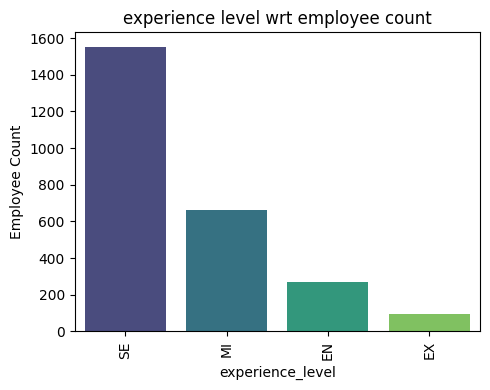

-------------------------------------------------
employment_type
  employment_type  count
0              FT   2547
1              PT     17
2              CT     10
3              FL     10


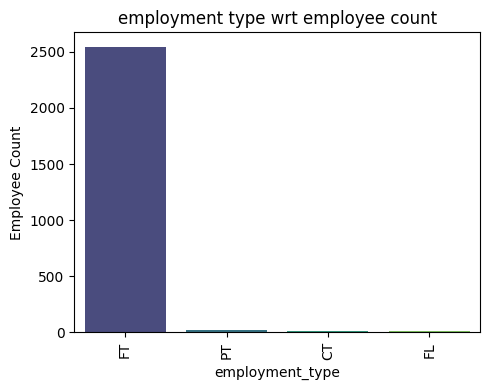

-------------------------------------------------
job_title
                    job_title  count
0               Data Engineer    598
1              Data Scientist    538
2                Data Analyst    396
3   Machine Learning Engineer    206
4          Analytics Engineer     91
..                        ...    ...
88    Compliance Data Analyst      1
89   Deep Learning Researcher      1
90         Staff Data Analyst      1
91       Data DevOps Engineer      1
92       Finance Data Analyst      1

[93 rows x 2 columns]


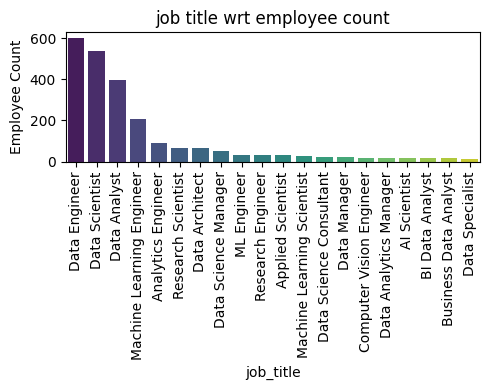

-------------------------------------------------
salary_currency
   salary_currency  count
0              USD   2107
1              EUR    200
2              GBP    144
3              INR     59
4              CAD     25
5              AUD      9
6              SGD      6
7              BRL      6
8              PLN      5
9              CHF      4
10             HUF      3
11             DKK      3
12             JPY      3
13             TRY      3
14             THB      2
15             ILS      1
16             HKD      1
17             CZK      1
18             MXN      1
19             CLP      1


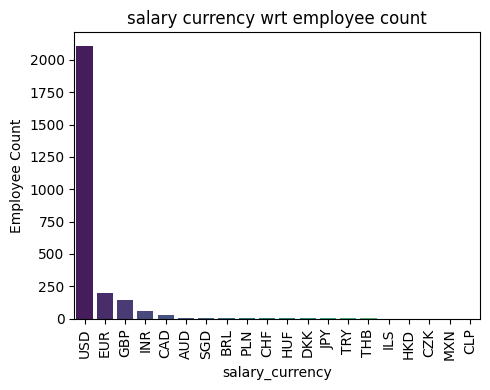

-------------------------------------------------
employee_residence
   employee_residence  count
0                  US   1893
1                  GB    150
2                  CA     81
3                  IN     70
4                  ES     47
..                ...    ...
73                 BA      1
74                 AM      1
75                 CY      1
76                 KW      1
77                 MT      1

[78 rows x 2 columns]


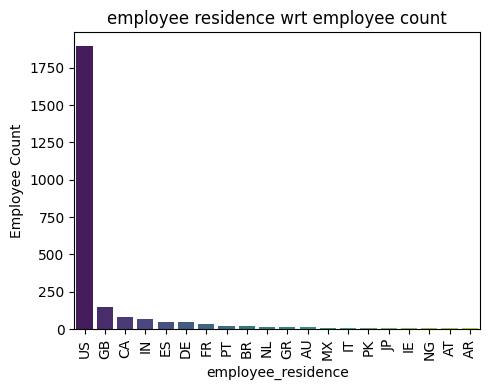

-------------------------------------------------
company_location
   company_location  count
0                US   1929
1                GB    155
2                CA     83
3                IN     57
4                DE     55
..              ...    ...
67               MK      1
68               BS      1
69               IR      1
70               CR      1
71               MT      1

[72 rows x 2 columns]


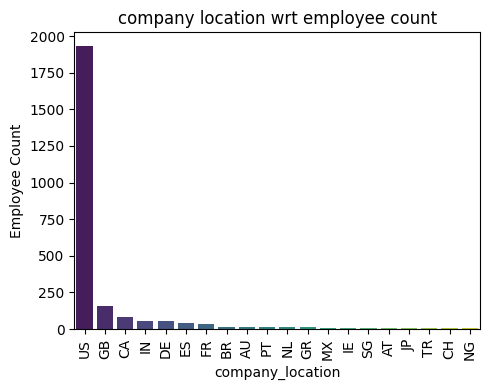

-------------------------------------------------
company_size
  company_size  count
0            M   2028
1            L    409
2            S    147


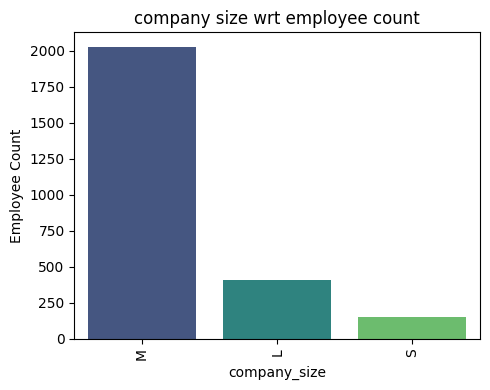

-------------------------------------------------


In [13]:
def Univariate_Analysis(excel_name, column):
    graph = excel_name[column].value_counts()
    print(f'{column}')
    print(graph.reset_index(name='count'))
    if graph.size > 30:
        graph = graph.head(20)
    plt.figure(figsize=(5,4))
    sns.barplot(x=graph.index,y=graph.values,palette='viridis')
    plt.xlabel(f'{column}')
    plt.ylabel('Employee Count')
    plt.title(f'{column.replace("_", " ")} wrt employee count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    print('-------------------------------------------------')

for i in non_numeric_columns:
    Univariate_Analysis(ds,i)

<Figure size 500x400 with 0 Axes>

<Axes: xlabel='salary_in_usd', ylabel='Count'>

Text(0.5, 0, 'Salary in USD')

Text(0.5, 1.0, 'Salary in USD Table')

Text(0, 0.5, 'Count')

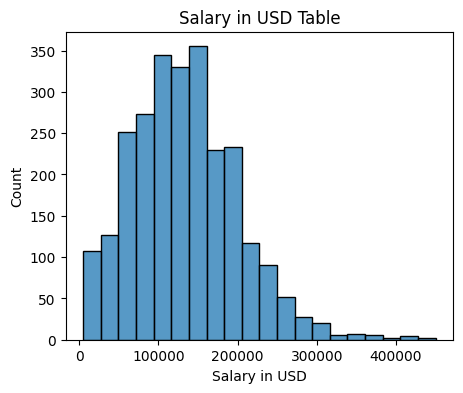

In [14]:
plt.figure(figsize=(5, 4))
sns.histplot(x=ds['salary_in_usd'],bins=20)
plt.xlabel('Salary in USD')
plt.title("Salary in USD Table")
plt.ylabel('Count')
plt.show()

In [15]:
#Check Outlier in "salary_in_usd" column
Q1 = ds['salary_in_usd'].quantile(0.25)
Q3 = ds['salary_in_usd'].quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print(f'Upper: {upper}')
print(f'Lower: {lower}')

Upper: 310037.5
Lower: -50062.5


In [16]:
ds[ds["salary_in_usd"]>upper]
print('Total Outlier',ds[ds["salary_in_usd"]>upper].shape)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2023,SE,FT,Computer Vision Engineer,342810,USD,342810,US,0,US,M
133,2023,SE,FT,Machine Learning Engineer,342300,USD,342300,US,0,US,L
145,2023,SE,FT,Machine Learning Engineer,318300,USD,318300,US,100,US,M
228,2023,EX,FT,Head of Data,329500,USD,329500,US,0,US,M
478,2023,EX,FT,Director of Data Science,353200,USD,353200,US,0,US,M
488,2023,SE,FT,Data Scientist,317070,USD,317070,US,0,US,M
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
649,2023,SE,FT,Data Architect,376080,USD,376080,US,100,US,M
845,2023,MI,FT,Research Scientist,340000,USD,340000,US,100,US,M
1105,2023,SE,FT,Data Scientist,370000,USD,370000,US,0,US,M


Total Outlier (29, 11)


<Figure size 1000x200 with 0 Axes>

<Axes: xlabel='salary_in_usd'>

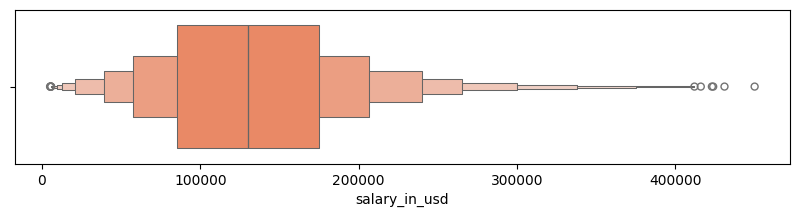

In [17]:
plt.figure(figsize=(10, 2))
sns.boxenplot(x=ds['salary_in_usd'],color='coral')

In [18]:
#Remort Work Ratio
counts=ds['remote_ratio'].value_counts()
counts


,count
remote_ratio,
100,1211
0,1186
50,187


<Figure size 500x400 with 0 Axes>

<Axes: xlabel='remote_ratio'>

Text(0.5, 0, 'Remote Ratio')

Text(0.5, 1.0, 'Remote Ratio Table')

Text(0, 0.5, 'Counts')

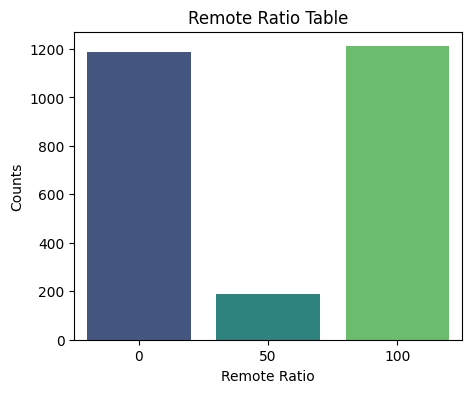

In [19]:
plt.figure(figsize=(5,4))
sns.barplot(x=counts.index,y=counts.values,palette='viridis')
plt.xlabel('Remote Ratio')
plt.title('Remote Ratio Table')
plt.ylabel('Counts')
plt.show()

In [20]:
# Company Size
Companycounts=ds['company_size'].value_counts()
Companycounts

,count
company_size,
M,2028
L,409
S,147


<Figure size 500x400 with 0 Axes>

<Axes: xlabel='company_size'>

Text(0.5, 0, 'Company Size')

Text(0.5, 1.0, 'Company Size Table')

Text(0, 0.5, 'Counts')

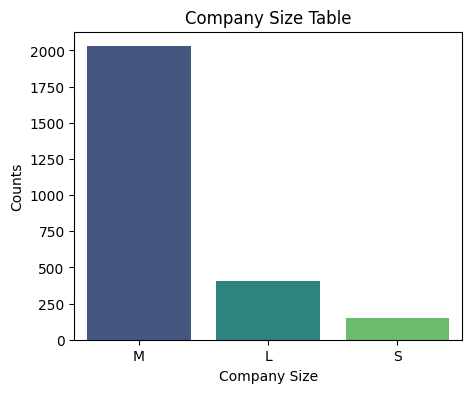

In [21]:
plt.figure(figsize=(5,4))
sns.barplot(x=Companycounts.index,y=Companycounts.values,palette='viridis')
plt.xlabel('Company Size')
plt.title('Company Size Table')
plt.ylabel('Counts')
plt.show()

### Multi-level analysis

<Figure size 500x400 with 0 Axes>

<Axes: >

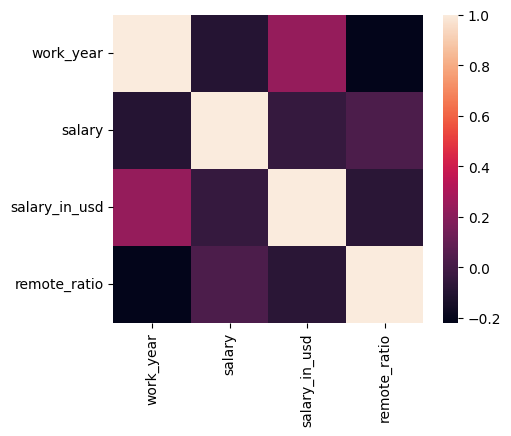

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(ds.corr(numeric_only=True))

In [23]:
ds.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [24]:
#drop outlier

ds=ds[ds["salary_in_usd"]<upper]

In [25]:
#experience_level VS avg salary
EvS=ds.groupby('experience_level')['salary'].mean()
EvS

,salary
experience_level,
EN,199203.914815
EX,246611.477778
MI,275736.480303
SE,178528.012378


<Figure size 500x400 with 0 Axes>

<Axes: xlabel='experience_level'>

Text(0.5, 0, 'experience_level')

Text(0, 0.5, 'salary range')

Text(0.5, 1.0, 'experience_level wrt avg salary')

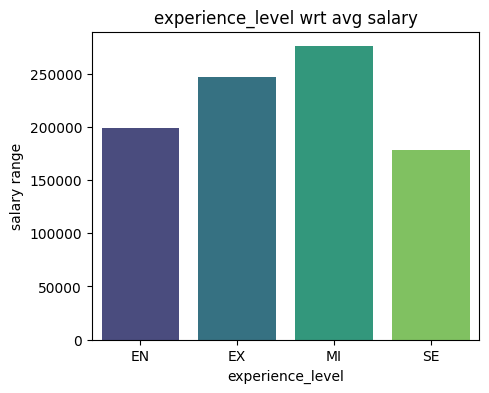

In [26]:
plt.figure(figsize=(5,4))
sns.barplot(x=EvS.index,y=EvS.values,palette='viridis')
plt.xlabel('experience_level')
plt.ylabel('salary range')
plt.title('experience_level wrt avg salary')
plt.show()

In [27]:
#employment_type VS avg salary
EtvS=ds.groupby('employment_type')['salary'].mean()
EtvS

,salary
employment_type,
CT,79666.666667
FL,288755.500000
FT,209227.323144
PT,79910.823529


<Figure size 500x400 with 0 Axes>

<Axes: xlabel='employment_type'>

Text(0.5, 0, 'employment_type')

Text(0, 0.5, 'salary range')

Text(0.5, 1.0, 'employment_type wrt avg salary')

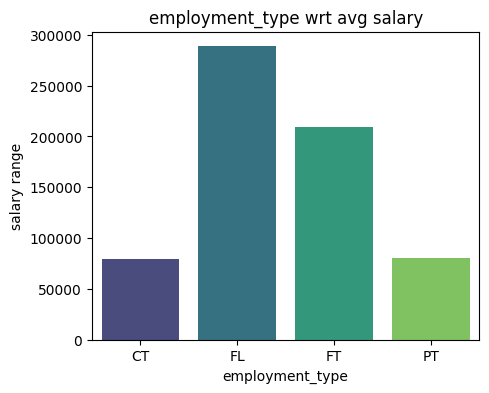

In [28]:
plt.figure(figsize=(5,4))
sns.barplot(x=EtvS.index,y=EtvS.values,palette='viridis')
plt.xlabel('employment_type')
plt.ylabel('salary range')
plt.title('employment_type wrt avg salary')
plt.show()

In [29]:
#company_location VS avg salary
cvS=ds.groupby('company_location')['salary'].mean()
cvS

,salary
company_location,
AE,100000.000000
AL,10000.000000
AM,50000.000000
AR,25000.000000
AS,468333.333333
...,...
TH,618333.333333
TR,114600.000000
UA,57850.000000


<Figure size 1500x400 with 0 Axes>

<Axes: xlabel='company_location'>

Text(0.5, 0, 'company_location')

Text(0, 0.5, 'salary range')

Text(0.5, 1.0, 'company_location wrt avg salary')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71],
 [Text(0, 0, 'AE'),
  Text(1, 0, 'AL'),
  Text(2, 0, 'AM'),
  Text(3, 0, 'AR'),
  Text(4, 0, 'AS'),
  Text(5, 0, 'AT'),
  Text(6, 0, 'AU'),
  Text(7, 0, 'BA'),
  Text(8, 0, 'BE'),
  Text(9, 0, 'BO'),
  Text(10, 0, 'BR'),
  Text(11, 0, 'BS'),
  Text(12, 0, 'CA'),
  Text(13, 0, 'CF'),
  Text(14, 0, 'CH'),
  Text(15, 0, 'CL'),
  Text(16, 0, 'CN'),
  Text(17, 0, 'CO'),
  Text(18, 0, 'CR'),
  Text(19, 0, 'CZ'),
  Text(20, 0, 'DE'),
  Text(21, 0, 'DK'),
  Text(22, 0, 'DZ'),
  Text(23, 0, 'EE'),
  Text(24, 0, 'EG'),
  Text(25, 0, 'ES'),
  Text(26, 0, 'FI'),
  Text(27, 0, 'FR'),

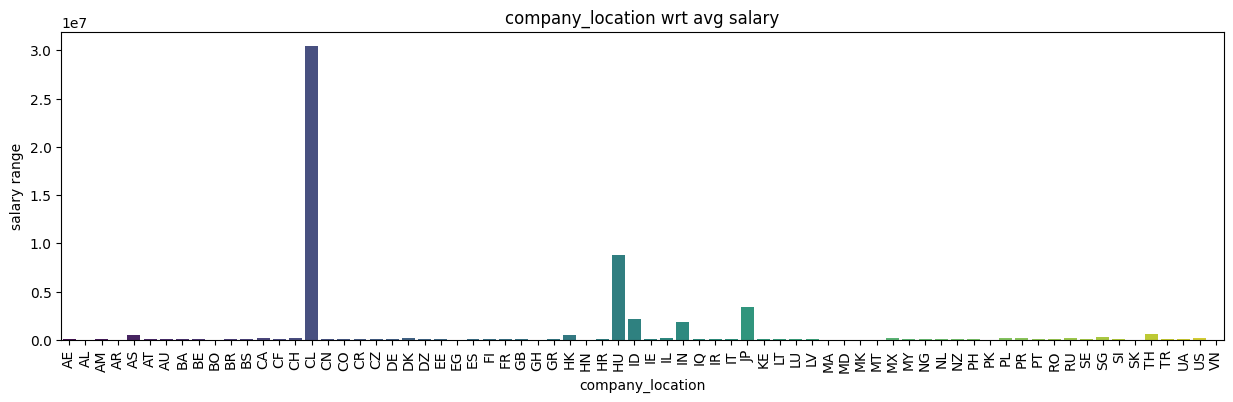

In [30]:
plt.figure(figsize=(15,4))
sns.barplot(x=cvS.index,y=cvS.values,palette='viridis')
plt.xlabel('company_location')
plt.ylabel('salary range')
plt.title('company_location wrt avg salary')
plt.xticks(rotation=90)
plt.show()

In [31]:
# Year VS avg salary
YvS=ds.groupby('work_year')['salary'].mean().reset_index(name='avg_salary')
YvS=YvS.set_index('work_year')
YvS

,avg_salary
work_year,
2020,377441.791667
2021,548857.469027
2022,176426.374552
2023,161171.985101


<Figure size 500x400 with 0 Axes>

<Axes: xlabel='work_year', ylabel='avg_salary'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Salary Range')

Text(0.5, 1.0, 'Avg Salary per Year')

(array([2019.5, 2020. , 2020.5, 2021. , 2021.5, 2022. , 2022.5, 2023. ,
        2023.5]),
 [Text(2019.5, 0, '2019.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2020.5, 0, '2020.5'),
  Text(2021.0, 0, '2021.0'),
  Text(2021.5, 0, '2021.5'),
  Text(2022.0, 0, '2022.0'),
  Text(2022.5, 0, '2022.5'),
  Text(2023.0, 0, '2023.0'),
  Text(2023.5, 0, '2023.5')])

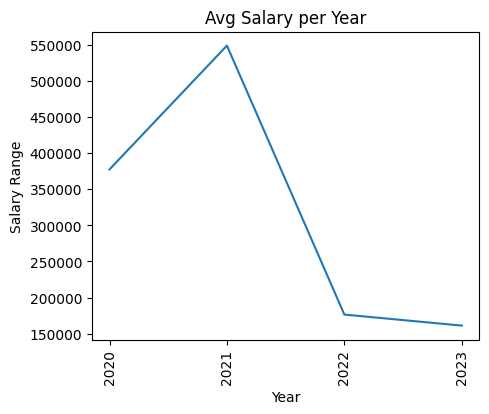

In [32]:
plt.figure(figsize=(5, 4))
sns.lineplot(x=YvS.index, y=YvS['avg_salary'])
plt.xlabel('Year')
plt.ylabel('Salary Range')
plt.title('Avg Salary per Year')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()


In [33]:
#Year vs experience empleyee
YExp=ds.groupby('work_year')['experience_level'].value_counts().unstack(fill_value=0)
YExp

experience_level,EN,EX,MI,SE
work_year,,,,
2020,22,2,31,17
2021,55,9,89,73
2022,110,38,287,681
2023,83,41,253,764


<Axes: xlabel='work_year'>

Text(0.5, 0, 'Work Year')

Text(0, 0.5, 'Employee Count')

Text(0.5, 1.0, 'Employee Count W.R.T. Experience Level by Year')

(array([0, 1, 2, 3]),
 [Text(0, 0, '2020'),
  Text(1, 0, '2021'),
  Text(2, 0, '2022'),
  Text(3, 0, '2023')])

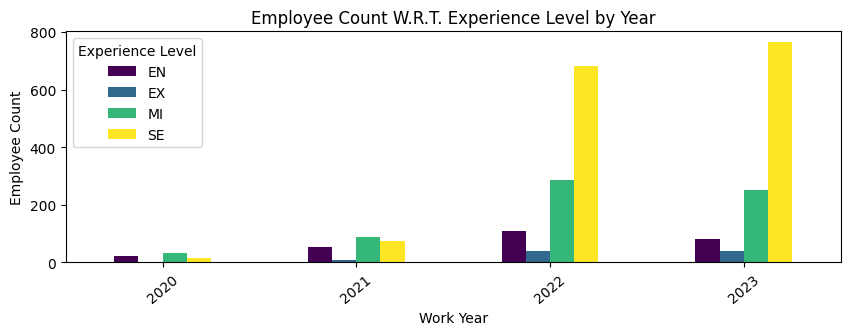

In [34]:
YExp.plot(kind='bar', figsize=(10,3), colormap='viridis')
plt.xlabel('Work Year')
plt.ylabel('Employee Count')
plt.title('Employee Count W.R.T. Experience Level by Year')
plt.xticks(rotation=40)
plt.legend(title='Experience Level')
plt.show()


In [35]:
#Year vs experience empleyee vs exp level
etExp=ds.groupby(['work_year', 'employment_type'])['experience_level'].value_counts().unstack(fill_value=0)
etExp

experience_level            EN  EX   MI   SE
work_year employment_type                   
2020      CT                 1   0    0    0
          FL                 0   0    0    1
          FT                19   2   31   16
          PT                 2   0    0    0
2021      CT                 0   0    1    1
          FL                 0   0    3    0
          FT                50   9   83   72
          PT                 5   0    2    0
2022      CT                 1   0    2    1
          FL                 2   0    2    0
          FT               101  38  282  680
          PT                 6   0    1    0
2023      CT                 0   0    2    0
          FL                 0   0    0    2
          FT                82  41  251  762
          PT                 1   0    0    0

<Axes: xlabel='work_year,employment_type'>

Text(0.5, 0, 'Employment Type')

Text(0, 0.5, 'Employee Count')

Text(0.5, 1.0, 'Employee Count W.R.T. Experience Level and Employment type')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '(2020, CT)'),
  Text(1, 0, '(2020, FL)'),
  Text(2, 0, '(2020, FT)'),
  Text(3, 0, '(2020, PT)'),
  Text(4, 0, '(2021, CT)'),
  Text(5, 0, '(2021, FL)'),
  Text(6, 0, '(2021, FT)'),
  Text(7, 0, '(2021, PT)'),
  Text(8, 0, '(2022, CT)'),
  Text(9, 0, '(2022, FL)'),
  Text(10, 0, '(2022, FT)'),
  Text(11, 0, '(2022, PT)'),
  Text(12, 0, '(2023, CT)'),
  Text(13, 0, '(2023, FL)'),
  Text(14, 0, '(2023, FT)'),
  Text(15, 0, '(2023, PT)')])

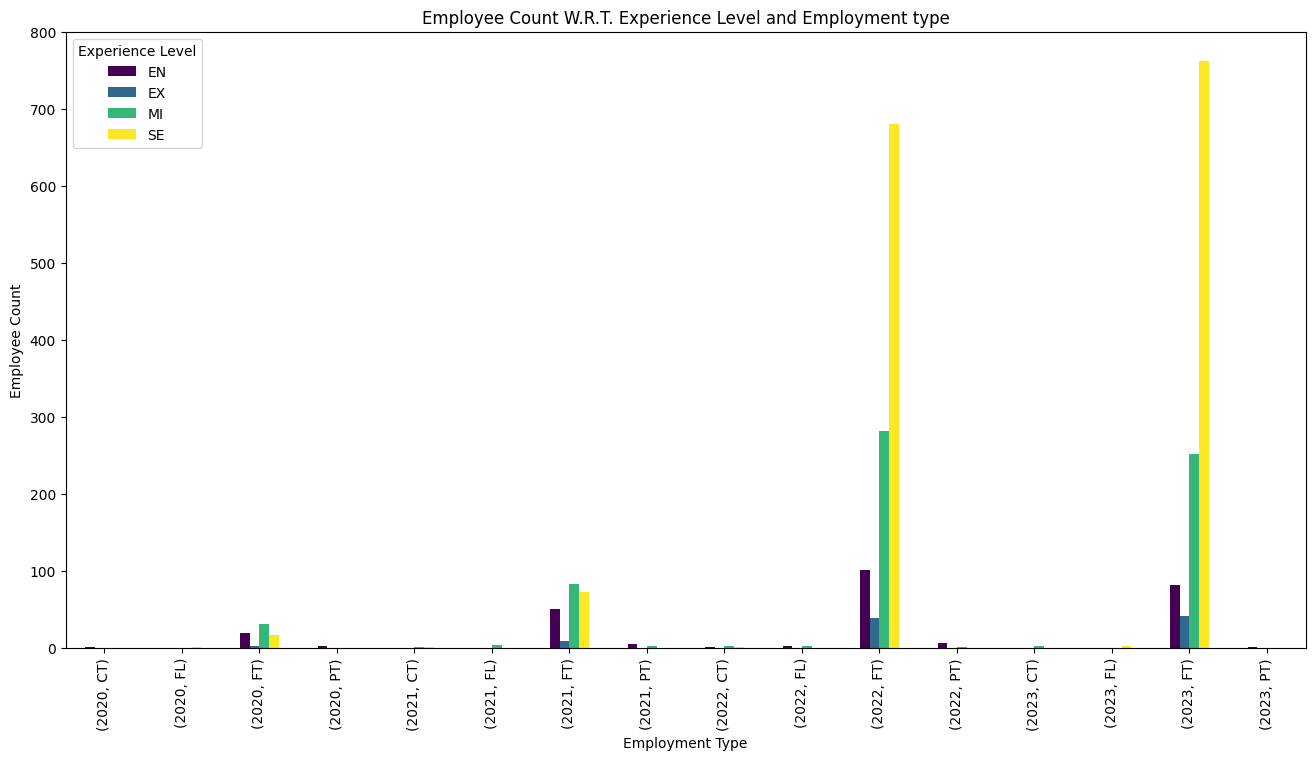

In [36]:
etExp.plot(kind='bar', figsize=(16,8), colormap='viridis')
plt.xlabel('Employment Type')
plt.ylabel('Employee Count')
plt.title('Employee Count W.R.T. Experience Level and Employment type')
plt.xticks(rotation=90)
plt.legend(title='Experience Level')
plt.show()
